## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [44]:
pip install catboost


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('/Users/apple/Downloads/Data_science_file/Agent8/Projects/Treking_cost_predictor/notebook/data/data.csv')

In [3]:
import pandas as pd

# Assuming your main DataFrame is called df

# 1. Columns with dtype int64
int_df = df.select_dtypes(include=['int64'])

# 2. Columns with dtype object (strings, etc.)
object_df = df.select_dtypes(include=['object'])

# 3. All other columns (float, bool, etc.)
other_df = df.drop(columns=int_df.columns.union(object_df.columns))


In [4]:
print("INT columns:", int_df.columns.tolist())
print("OBJECT columns:", object_df.columns.tolist())
print("OTHER dtype columns:", other_df.columns.tolist())


INT columns: ['Duration_days', 'Elevation_gain_m', 'Max_altitude_m', 'Group_size', 'Guide_cost_rupees', 'Permit_fee_rupees', 'age', 'zip_code', 'emergency contact details', 'Hotel_Price_per_day', 'trek_total_cost(rupees)']
OBJECT columns: ['trek_ID', 'Company Name', 'Trek_Location', 'Region', 'Country', 'Industry', 'Contact Email', 'Difficulty', 'Season', 'Weather', 'Accessibility', 'Accommodation', 'Currency', 'Best_Season', 'Best_Month', 'surname', 'address', 'phone_no', 'gender', 'city', 'state', 'traveler_name', 'health_check_up', 'payment status', 'booking_status', 'traveller_profession', 'payment information', 'identification documents (for permits)', 'Hotel_Name', 'City', 'trek_start_date', 'trek_end_date', 'trek_type', 'Backpack', 'Footwear', 'waterproof/windproof jackets', 'trekking_shoes', 'Lighting', 'Cash/online']
OTHER dtype columns: ['trek_rating', 'Distance_km', 'Avg_temp_C', 'Permit_required', 'Local_cost_index', 'weight', 'height', 'bmi', 'accommodation_rating', 'wi-fi

In [7]:
import pandas as pd

# Select object and int columns separately
object_cols = df.select_dtypes(include=['object'])
int_cols = df.select_dtypes(include=['int64'])

# Concatenate with object columns first
ordered_df = pd.concat([object_cols, int_cols], axis=1)

# Save to CSV
ordered_df.to_csv('object_then_int_columns.csv', index=False)


#### drop - trek_ID , Contact Email,Company Name,trek_start_date,address,trek_end_date,phone_no ,Hotel_Name


In [8]:
ordered_df.head(5)

,trek_ID,Company Name,Trek_Location,Region,Country,Industry,Contact Email,Difficulty,Season,Weather,...,Elevation_gain_m,Max_altitude_m,Group_size,Guide_cost_rupees,Permit_fee_rupees,age,zip_code,emergency contact details,Hotel_Price_per_day,trek_total_cost(rupees)
0,TREK1000,Bhatnagar LLC Adventures,Rishikesh,Northeast India,India,Travel,tandonshivani@example.in,Easy,Autumn,Cloudy,...,658,1680,10,1032,0,56,593444,2075544566,1694,23439
1,TREK1001,"Raghavan, Kadakia and Chandra Adventures",Tawang,East India,India,Adventure Sports,ybalakrishnan@example.in,Easy,Spring,Sunny,...,1337,3047,16,1037,0,20,973664,19825149,1410,22860
2,TREK1002,"Agate, Sehgal and Lata Adventures",Darjeeling,West India,India,Tourism,harshnadkarni@example.org,Easy,Autumn,Windy,...,2282,3375,9,3525,1477,38,391558,269706764,2568,39875
3,TREK1003,Bal Ltd Adventures,Munnar,South India,India,Adventure Sports,rajtarak@example.in,Very Difficult,Monsoon,Cloudy,...,2445,3979,16,3807,1123,22,296421,9573835727,1218,11476
4,TREK1004,"Balakrishnan, Wable and Kapadia Adventures",Munnar,North India,India,Adventure Sports,jtandon@example.org,Very Difficult,Winter,Snowy,...,2010,3268,9,900,408,54,195158,8833655734,2380,9876


In [ ]:
for col in ordered_df.columns:
    uniques = ordered_df[col].unique()
    print(f"{col} ({len(uniques)} unique): {uniques[:10]}")  # first 10 only
    print("-" * 40)



trek_ID (500 unique): ['TREK1000' 'TREK1001' 'TREK1002' 'TREK1003' 'TREK1004' 'TREK1005'
 'TREK1006' 'TREK1007' 'TREK1008' 'TREK1009']
----------------------------------------
Company Name (498 unique): ['Bhatnagar LLC Adventures' 'Raghavan, Kadakia and Chandra Adventures'
 'Agate, Sehgal and Lata Adventures' 'Bal Ltd Adventures'
 'Balakrishnan, Wable and Kapadia Adventures' 'Kashyap-Kanda Adventures'
 'Chaudhry, Grewal and Minhas Adventures'
 'Gupta, Mitter and Mander Adventures' 'Srinivasan and Sons Adventures'
 'Prasad-Chadha Adventures']
----------------------------------------
Trek_Location (12 unique): ['Rishikesh' 'Tawang' 'Darjeeling' 'Munnar' 'Auli' 'Manali' 'Kodaikanal'
 'Coorg' 'Nainital' 'Gangtok']
----------------------------------------
Region (5 unique): ['Northeast India' 'East India' 'West India' 'South India' 'North India']
----------------------------------------
Country (1 unique): ['India']
----------------------------------------
Industry (3 unique): ['Travel' 'Ad

In [11]:
import pandas as pd

# Define the columns to drop
cols_to_drop = [
    'trek_ID', 
    'Contact Email',
    'Company Name',
    'trek_start_date',
    'address',
    'trek_end_date',
    'phone_no',
    'Hotel_Name'
]

# Drop those columns from the DataFrame
df_filtered = df.drop(columns=cols_to_drop)

# Separate object and int columns
object_cols = df_filtered.select_dtypes(include=['object'])
int_cols = df_filtered.select_dtypes(include=['int64'])

# Combine with object columns first
final_df = pd.concat([object_cols, int_cols], axis=1)

# Save to CSV
final_df.to_csv('object_first_int_next.csv', index=False)


In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Trek_Location                           500 non-null    object
 1   Region                                  500 non-null    object
 2   Country                                 500 non-null    object
 3   Industry                                500 non-null    object
 4   Difficulty                              500 non-null    object
 5   Season                                  500 non-null    object
 6   Weather                                 500 non-null    object
 7   Accessibility                           500 non-null    object
 8   Accommodation                           500 non-null    object
 9   Currency                                500 non-null    object
 10  Best_Season                             500 non-null    object
 11  Best_M

In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in final_df.columns if final_df[feature].dtype != 'O'] # not equal to Object
categorical_features = [feature for feature in final_df.columns if final_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Duration_days', 'Elevation_gain_m', 'Max_altitude_m', 'Group_size', 'Guide_cost_rupees', 'Permit_fee_rupees', 'age', 'zip_code', 'emergency contact details', 'Hotel_Price_per_day', 'trek_total_cost(rupees)']

We have 31 categorical features : ['Trek_Location', 'Region', 'Country', 'Industry', 'Difficulty', 'Season', 'Weather', 'Accessibility', 'Accommodation', 'Currency', 'Best_Season', 'Best_Month', 'surname', 'gender', 'city', 'state', 'traveler_name', 'health_check_up', 'payment status', 'booking_status', 'traveller_profession', 'payment information', 'identification documents (for permits)', 'City', 'trek_type', 'Backpack', 'Footwear', 'waterproof/windproof jackets', 'trekking_shoes', 'Lighting', 'Cash/online']


In [ ]:
# Select int and object columns
int_and_object_df = df.select_dtypes(include=['int64', 'object'])
int_and_object_df.info()
# Save to CSV
#int_and_object_df.to_csv('int_obj_only.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   trek_ID                                 500 non-null    object
 1   Company Name                            500 non-null    object
 2   Trek_Location                           500 non-null    object
 3   Region                                  500 non-null    object
 4   Country                                 500 non-null    object
 5   Industry                                500 non-null    object
 6   Contact Email                           500 non-null    object
 7   Duration_days                           500 non-null    int64 
 8   Elevation_gain_m                        500 non-null    int64 
 9   Max_altitude_m                          500 non-null    int64 
 10  Difficulty                              500 non-null    object
 11  Season

#### Show Top 5 Records

### Use target-guided ordinal encoding when:
- You have a categorical feature with many unique values. 
- You believe there's a strong relationship between the categorical feature and the target variable. 
- The relationship with the target variable implies an ordinal nature that can be exploited by the model. 

In [48]:
df.head()

,trek_ID,Company Name,Trek_Location,trek_rating,Region,Country,Industry,Contact Email,Distance_km,Duration_days,...,pool,bar,trek_total_cost(rupees),trek_type,Backpack,Footwear,waterproof/windproof jackets,trekking_shoes,Lighting,Cash/online
0,TREK1000,Bhatnagar LLC Adventures,Rishikesh,3.9,Northeast India,India,Travel,tandonshivani@example.in,103.22,14,...,False,True,23439,Solo,No,Sandals,No,Yes,Torch,Online
1,TREK1001,"Raghavan, Kadakia and Chandra Adventures",Tawang,4.9,East India,India,Adventure Sports,ybalakrishnan@example.in,39.30,14,...,False,False,22860,Group,No,Sandals,Yes,No,Not_required,Cash
2,TREK1002,"Agate, Sehgal and Lata Adventures",Darjeeling,4.9,West India,India,Tourism,harshnadkarni@example.org,35.40,5,...,False,False,39875,Family,Yes,Trekking Shoes,No,Yes,Not_required,Both
3,TREK1003,Bal Ltd Adventures,Munnar,3.2,South India,India,Adventure Sports,rajtarak@example.in,43.37,11,...,True,True,11476,Group,No,Sports Shoes,Yes,No,Headlamp,Online
4,TREK1004,"Balakrishnan, Wable and Kapadia Adventures",Munnar,3.5,North India,India,Adventure Sports,jtandon@example.org,95.63,10,...,False,True,9876,Family,No,Sandals,Yes,Yes,Headlamp,Online


#### Preparing X and Y variables

In [49]:
X = df.drop(columns=['trek_total_cost(rupees)'],axis=1)

In [50]:
X.head(2)

,trek_ID,Company Name,Trek_Location,trek_rating,Region,Country,Industry,Contact Email,Distance_km,Duration_days,...,dinner,pool,bar,trek_type,Backpack,Footwear,waterproof/windproof jackets,trekking_shoes,Lighting,Cash/online
0,TREK1000,Bhatnagar LLC Adventures,Rishikesh,3.9,Northeast India,India,Travel,tandonshivani@example.in,103.22,14,...,False,False,True,Solo,No,Sandals,No,Yes,Torch,Online
1,TREK1001,"Raghavan, Kadakia and Chandra Adventures",Tawang,4.9,East India,India,Adventure Sports,ybalakrishnan@example.in,39.30,14,...,True,False,False,Group,No,Sandals,Yes,No,Not_required,Cash


In [52]:
y = df['trek_total_cost(rupees)']

In [53]:
y

0      23439
1      22860
2      39875
3      11476
4       9876
       ...  
495    18622
496    26223
497    10632
498    16419
499    40671
Name: trek_total_cost(rupees), Length: 500, dtype: int64

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 64 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   trek_ID                                 500 non-null    object 
 1   Company Name                            500 non-null    object 
 2   Trek_Location                           500 non-null    object 
 3   trek_rating                             500 non-null    float64
 4   Region                                  500 non-null    object 
 5   Country                                 500 non-null    object 
 6   Industry                                500 non-null    object 
 7   Contact Email                           500 non-null    object 
 8   Distance_km                             500 non-null    float64
 9   Duration_days                           500 non-null    int64  
 10  Elevation_gain_m                        500 non-null    int64 

In [55]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: trek_total_cost(rupees)
Non-Null Count  Dtype
--------------  -----
500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [56]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] # not equal to Object
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 26 numerical features : ['trek_rating', 'Distance_km', 'Duration_days', 'Elevation_gain_m', 'Max_altitude_m', 'Avg_temp_C', 'Group_size', 'Permit_required', 'Guide_cost_rupees', 'Permit_fee_rupees', 'Local_cost_index', 'age', 'zip_code', 'emergency contact details', 'weight', 'height', 'bmi', 'accommodation_rating', 'Hotel_Price_per_day', 'wi-fi_facility', 'breakfast', 'lunch', 'dinner', 'pool', 'bar', 'trek_total_cost(rupees)']

We have 39 categorical features : ['trek_ID', 'Company Name', 'Trek_Location', 'Region', 'Country', 'Industry', 'Contact Email', 'Difficulty', 'Season', 'Weather', 'Accessibility', 'Accommodation', 'Currency', 'Best_Season', 'Best_Month', 'surname', 'address', 'phone_no', 'gender', 'city', 'state', 'traveler_name', 'health_check_up', 'payment status', 'booking_status', 'traveller_profession', 'payment information', 'identification documents (for permits)', 'Hotel_Name', 'City', 'trek_start_date', 'trek_end_date', 'trek_type', 'Backpack', 'Footwear', 'w

In [57]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [58]:
# X
num_features

Index(['trek_rating', 'Distance_km', 'Duration_days', 'Elevation_gain_m',
       'Max_altitude_m', 'Avg_temp_C', 'Group_size', 'Permit_required',
       'Guide_cost_rupees', 'Permit_fee_rupees', 'Local_cost_index', 'age',
       'zip_code', 'emergency contact details', 'weight', 'height', 'bmi',
       'accommodation_rating', 'Hotel_Price_per_day', 'wi-fi_facility',
       'breakfast', 'lunch', 'dinner', 'pool', 'bar'],
      dtype='object')

In [59]:
# X
cat_features

Index(['trek_ID', 'Company Name', 'Trek_Location', 'Region', 'Country',
       'Industry', 'Contact Email', 'Difficulty', 'Season', 'Weather',
       'Accessibility', 'Accommodation', 'Currency', 'Best_Season',
       'Best_Month', 'surname', 'address', 'phone_no', 'gender', 'city',
       'state', 'traveler_name', 'health_check_up', 'payment status',
       'booking_status', 'traveller_profession', 'payment information',
       'identification documents (for permits)', 'Hotel_Name', 'City',
       'trek_start_date', 'trek_end_date', 'trek_type', 'Backpack', 'Footwear',
       'waterproof/windproof jackets', 'trekking_shoes', 'Lighting',
       'Cash/online'],
      dtype='object')

In [60]:
X = preprocessor.fit_transform(X)

In [61]:
X.shape

(500, 4392)

In [62]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32000 stored elements and shape (500, 4392)>

In [63]:
y

0      23439
1      22860
2      39875
3      11476
4       9876
       ...  
495    18622
496    26223
497    10632
498    16419
499    40671
Name: trek_total_cost(rupees), Length: 500, dtype: int64

In [64]:
y.shape

(500,)

In [65]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((400, 4392), (100, 4392))

In [66]:
X_train.shape

(400, 4392)

## Ensure target is a 2D column

In [67]:
y_train.shape

(400,)

#### Create an Evaluate Function to give all metrics after model Training

In [68]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [69]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3148
- Mean Absolute Error: 0.2529
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13506.2462
- Mean Absolute Error: 11246.4702
- R2 Score: -0.5877




/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.545e+07, tolerance: 4.859e+06
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 296.2327
- Mean Absolute Error: 253.9579
- R2 Score: 0.9993
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14847.0444
- Mean Absolute Error: 12149.5910
- R2 Score: -0.9185


Ridge
Model performance for Training set
- Root Mean Squared Error: 861.1255
- Mean Absolute Error: 725.9137
- R2 Score: 0.9939
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13417.3360
- Mean Absolute Error: 11181.8302
- R2 Score: -0.5668


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 10157.8088
- Mean Absolute Error: 8602.8550
- R2 Score: 0.1506
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12006.1121
- Mean Absolute Error: 10460.0860
- R2 Score: -0.2546


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2

### Results

In [70]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,-0.121992
5,Random Forest Regressor,-0.158753
7,CatBoosting Regressor,-0.226512
3,K-Neighbors Regressor,-0.254573
6,XGBRegressor,-0.392060
2,Ridge,-0.566837
0,Linear Regression,-0.587671
1,Lasso,-0.918542
4,Decision Tree,-1.213256


## Linear Regression

In [71]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -58.77


## Plot y_pred and y_test

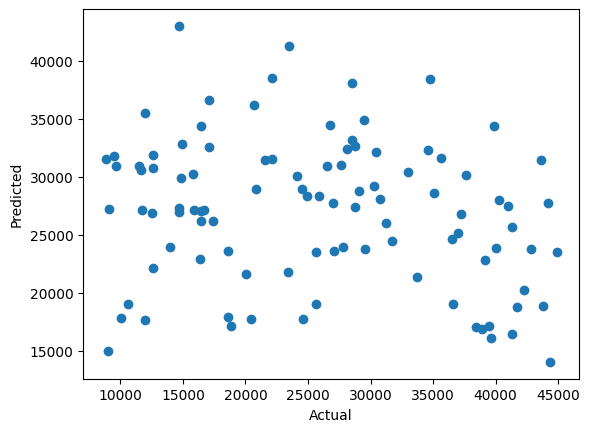

In [72]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

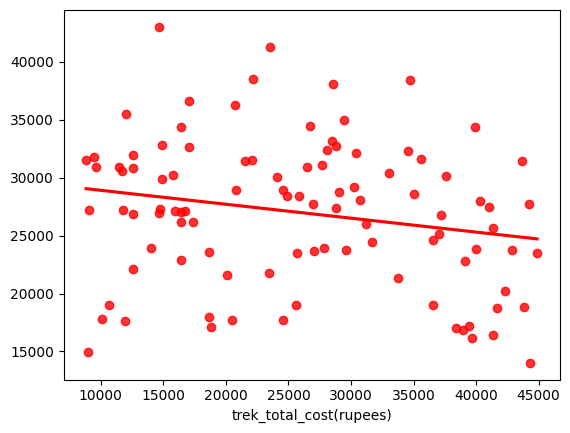

In [73]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [74]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
361,28520,33183.949159,-4663.949159
73,30269,29209.918725,1059.081275
374,11963,17612.672699,-5649.672699
155,28117,32409.147470,-4292.147470
104,40296,27964.207184,12331.792816
...,...,...,...
347,14890,32810.463181,-17920.463181
86,36537,24657.250790,11879.749210
75,24885,28369.656576,-3484.656576
438,12574,30788.787087,-18214.787087
